In [1]:
import importlib
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns


import utils

importlib.reload(utils)

<module 'utils' from '/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_01_02/utils.py'>

## データ読み込み

In [2]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[3].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

IMAGE_NAMES = ["image_t.png", "image_t-0.5.png", "image_t-1.0.png"]

In [3]:
tr_df = utils.read_feature_csv(TR_FEATURES_CSV)
tr_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320"""
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420"""


In [4]:
ts_df = utils.read_feature_csv(TS_FEATURES_CSV)
ts_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,str,str
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""120"""
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""220"""


In [5]:
tr_images = utils.load_images(
    IMAGES_DIR, ids=tr_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(tr_images.shape)
ts_images = utils.load_images(
    IMAGES_DIR, ids=ts_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(ts_images.shape)

(43371, 3, 64, 128, 3)
(1727, 3, 64, 128, 3)


In [6]:
tr_images = utils.preprocess_images(tr_images)
ts_images = utils.preprocess_images(ts_images)

print(tr_images.shape)
print(ts_images.shape)

(43371, 9, 64, 128)
(1727, 9, 64, 128)


## Target

In [7]:
target = utils.CoordinateTarget(prefix="tg_")
target.fit(tr_df)

tg_df = target.transform(tr_df)
print(tg_df.columns)
print(tg_df.describe().glimpse())
tr_df = pl.concat([tr_df, tg_df], how="horizontal")

['tg_cood_x_0', 'tg_cood_y_0', 'tg_cood_z_0', 'tg_cood_x_1', 'tg_cood_y_1', 'tg_cood_z_1', 'tg_cood_x_2', 'tg_cood_y_2', 'tg_cood_z_2', 'tg_cood_x_3', 'tg_cood_y_3', 'tg_cood_z_3', 'tg_cood_x_4', 'tg_cood_y_4', 'tg_cood_z_4', 'tg_cood_x_5', 'tg_cood_y_5', 'tg_cood_z_5']
Rows: 9
Columns: 19
$ statistic   <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ tg_cood_x_0 <f64> 43371.0, 0.0, 4.122443942757371, 3.2667167639213908, -1.7321542071537557, 1.116530690565041, 3.843337458989432, 6.4281197924248215, 12.392587231992154
$ tg_cood_y_0 <f64> 43371.0, 0.0, 0.0019486856369589753, 0.11686590022408185, -2.5341378248203235, -0.02646308932096216, 0.0010884804706597444, 0.030664179622664968, 3.4595563267615925
$ tg_cood_z_0 <f64> 43371.0, 0.0, 0.001247332026343412, 0.040745039147660006, -0.9965478318668152, -0.017624552286421614, 0.0011112325970167394, 0.01959056385186172, 1.4479292511292303
$ tg_cood_x_1 <f64> 43371.0, 0.0, 8.694386412319787, 6.894354638218222, -3.1

## 特徴量

In [8]:
feature = utils.Feature(prefix="ft_")
feature.fit(tr_df)

ft_df = feature.transform(tr_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
tr_df = pl.concat([tr_df, ft_df], how="horizontal")

ft_df = feature.transform(ts_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
ts_df = pl.concat([ts_df, ft_df], how="horizontal")

['ft_vEgo', 'ft_aEgo', 'ft_steeringAngleDeg', 'ft_steeringTorque', 'ft_brake', 'ft_brakePressed', 'ft_gas', 'ft_gasPressed', 'ft_is_gearShifter_drive', 'ft_is_gearShifter_neutral', 'ft_is_gearShifter_park', 'ft_is_gearShifter_reverse', 'ft_leftBlinker', 'ft_rightBlinker']
Rows: 9
Columns: 15
$ statistic                 <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ ft_vEgo                   <f64> 43371.0, 0.0, 9.172175823216334, 7.226919878374694, -0.1619189828634262, 2.5786657333374023, 8.518790245056152, 14.286815643310547, 27.55126190185547
$ ft_aEgo                   <f64> 43371.0, 0.0, -0.015654028629347255, 0.6324016778486632, -4.936206340789795, -0.2363678514957428, -1.8347540436410405e-15, 0.22229795157909396, 3.1400704383850098
$ ft_steeringAngleDeg       <f64> 43371.0, 0.0, -2.065172574071012, 65.54882159006848, -481.394287109375, -3.461754322052002, -0.35647091269493103, 2.6269068717956543, 484.69171142578125
$ ft_steeringTorque         <f64>

## モデリング

In [9]:
N_SPLITS = 2

In [10]:
model_params = {
    "dnn": {
        "n_img_channels": 3 * 3,
        "n_features": len(feature.columns),
        "n_targets": len(target.columns),
        "segmentation_model_params": {
            "encoder_name": "resnet18",
            "encoder_weights": "imagenet",
            "decoder_channels": (256, 128, 64, 32, 16),
        },
    },
    "dev": "cuda",
}

lr = 1e-4
fit_params = {
    "dnn": {
        "tr_batch_size": 128,
        "vl_batch_size": 128,
        "trainer_params": {
            "criterion_params": {},
            "opt": "adamw",
            "opt_params": {"lr": lr, "weight_decay": 1e-4},
            "backbone_opt_params": {"lr": lr, "weight_decay": 1e-4},
            "sch_params": {
                "max_lr": lr,
                "pct_start": 0.1,
                "div_factor": 25,
                "final_div_factor": 1000,
            },
            "epochs": 20,
            "dev": "cuda",
            "prefix": "",
            "save_best": False,
            "save_epochs": [],
            "maximize_score": False,
            "grad_max_norm": None,
        },
    },
}

In [11]:
models, oof_preds = utils.train(
    model_params=model_params,
    fit_params=fit_params,
    df=tr_df,
    images=tr_images,
    target_cols=target.columns,
    feature_cols=feature.columns,
    group_col="scene_id",
    n_splits=N_SPLITS,
)

-----------------
-----------------
Training fold 0...
train samples: 21685, valid samples: 21686
Save model : model.pth

epoch  0
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06


100%|██████████| 170/170 [00:03<00:00, 48.54it/s]



Train Loss: 0.8498
{'loss': 0.8498171754842679, 'loss_mae': 0.8498171754842679}
Valid Loss: 0.8064
{'loss': 0.8063690392410054, 'loss_mae': 0.8063690392410054}
Update best score : 0.8063690392410054
Save model : model.pth

epoch  1
lr  5.222373279130378e-05
lr  5.222373279130378e-05
lr  5.222373279130378e-05
lr  5.222373279130378e-05


100%|██████████| 170/170 [00:03<00:00, 49.45it/s]



Train Loss: 0.7648
{'loss': 0.7647945387123605, 'loss_mae': 0.7647945387123605}
Valid Loss: 0.7183
{'loss': 0.7182889296728022, 'loss_mae': 0.7182889296728022}
Update best score : 0.7182889296728022
Save model : model.pth

epoch  2
lr  9.999997333731242e-05
lr  9.999997333731242e-05
lr  9.999997333731242e-05
lr  9.999997333731242e-05


100%|██████████| 170/170 [00:03<00:00, 49.33it/s]



Train Loss: 0.6876
{'loss': 0.6876320521507038, 'loss_mae': 0.6876320521507038}
Valid Loss: 0.6604
{'loss': 0.6603556334972381, 'loss_mae': 0.6603556334972381}
Update best score : 0.6603556334972381
Save model : model.pth

epoch  3
lr  9.923142547371855e-05
lr  9.923142547371855e-05
lr  9.923142547371855e-05
lr  9.923142547371855e-05


100%|██████████| 170/170 [00:03<00:00, 49.69it/s]



Train Loss: 0.6310
{'loss': 0.6309703029471742, 'loss_mae': 0.6309703029471742}
Valid Loss: 0.6196
{'loss': 0.6195596370626898, 'loss_mae': 0.6195596370626898}
Update best score : 0.6195596370626898
Save model : model.pth

epoch  4
lr  9.696706642839703e-05
lr  9.696706642839703e-05
lr  9.696706642839703e-05
lr  9.696706642839703e-05


100%|██████████| 170/170 [00:03<00:00, 49.16it/s]



Train Loss: 0.5851
{'loss': 0.5851367897183232, 'loss_mae': 0.5851367897183232}
Valid Loss: 0.5928
{'loss': 0.5927678846261081, 'loss_mae': 0.5927678846261081}
Update best score : 0.5927678846261081
Save model : model.pth

epoch  5
lr  9.327569760511897e-05
lr  9.327569760511897e-05
lr  9.327569760511897e-05
lr  9.327569760511897e-05


100%|██████████| 170/170 [00:03<00:00, 49.56it/s]



Train Loss: 0.5523
{'loss': 0.5523296913804387, 'loss_mae': 0.5523296913804387}
Valid Loss: 0.5552
{'loss': 0.5552230845479404, 'loss_mae': 0.5552230845479404}
Update best score : 0.5552230845479404
Save model : model.pth

epoch  6
lr  8.826947937765693e-05
lr  8.826947937765693e-05
lr  8.826947937765693e-05
lr  8.826947937765693e-05


100%|██████████| 170/170 [00:03<00:00, 49.37it/s]



Train Loss: 0.5241
{'loss': 0.524091347434817, 'loss_mae': 0.524091347434817}
Valid Loss: 0.5392
{'loss': 0.539233584614361, 'loss_mae': 0.539233584614361}
Update best score : 0.539233584614361
Save model : model.pth

epoch  7
lr  8.210052315358372e-05
lr  8.210052315358372e-05
lr  8.210052315358372e-05
lr  8.210052315358372e-05


100%|██████████| 170/170 [00:03<00:00, 48.42it/s]



Train Loss: 0.5004
{'loss': 0.5004117404215435, 'loss_mae': 0.5004117404215435}
Valid Loss: 0.5280
{'loss': 0.5280383053947898, 'loss_mae': 0.5280383053947898}
Update best score : 0.5280383053947898
Save model : model.pth

epoch  8
lr  7.495626954612528e-05
lr  7.495626954612528e-05
lr  7.495626954612528e-05
lr  7.495626954612528e-05


100%|██████████| 170/170 [00:03<00:00, 49.37it/s]



Train Loss: 0.4809
{'loss': 0.48085198476469726, 'loss_mae': 0.48085198476469726}
Valid Loss: 0.5045
{'loss': 0.5044723747407689, 'loss_mae': 0.5044723747407689}
Update best score : 0.5044723747407689
Save model : model.pth

epoch  9
lr  6.70537930859775e-05
lr  6.70537930859775e-05
lr  6.70537930859775e-05
lr  6.70537930859775e-05


100%|██████████| 170/170 [00:03<00:00, 50.10it/s]



Train Loss: 0.4636
{'loss': 0.46359683476256197, 'loss_mae': 0.46359683476256197}
Valid Loss: 0.5114
{'loss': 0.5114374786615372, 'loss_mae': 0.5114374786615372}
Save model : model.pth

epoch  10
lr  5.863320652153597e-05
lr  5.863320652153597e-05
lr  5.863320652153597e-05
lr  5.863320652153597e-05


100%|██████████| 170/170 [00:03<00:00, 49.54it/s]



Train Loss: 0.4484
{'loss': 0.44843004405851195, 'loss_mae': 0.44843004405851195}
Valid Loss: 0.5153
{'loss': 0.5153224340256523, 'loss_mae': 0.5153224340256523}
Save model : model.pth

epoch  11
lr  4.9950365114538776e-05
lr  4.9950365114538776e-05
lr  4.9950365114538776e-05
lr  4.9950365114538776e-05


100%|██████████| 170/170 [00:03<00:00, 49.36it/s]



Train Loss: 0.4359
{'loss': 0.4358884327157715, 'loss_mae': 0.4358884327157715}
Valid Loss: 0.4983
{'loss': 0.49829257200745974, 'loss_mae': 0.49829257200745974}
Update best score : 0.49829257200745974
Save model : model.pth

epoch  12
lr  4.1269092607407813e-05
lr  4.1269092607407813e-05
lr  4.1269092607407813e-05
lr  4.1269092607407813e-05


100%|██████████| 170/170 [00:03<00:00, 49.20it/s]



Train Loss: 0.4281
{'loss': 0.4281404751997728, 'loss_mae': 0.4281404751997728}
Valid Loss: 0.5005
{'loss': 0.500466182477334, 'loss_mae': 0.500466182477334}
Save model : model.pth

epoch  13
lr  3.28531650723364e-05
lr  3.28531650723364e-05
lr  3.28531650723364e-05
lr  3.28531650723364e-05


100%|██████████| 170/170 [00:03<00:00, 49.67it/s]



Train Loss: 0.4170
{'loss': 0.4170458297405017, 'loss_mae': 0.4170458297405017}
Valid Loss: 0.4869
{'loss': 0.4869081577833961, 'loss_mae': 0.4869081577833961}
Update best score : 0.4869081577833961
Save model : model.pth

epoch  14
lr  2.4958296208812863e-05
lr  2.4958296208812863e-05
lr  2.4958296208812863e-05
lr  2.4958296208812863e-05


100%|██████████| 170/170 [00:03<00:00, 48.50it/s]



Train Loss: 0.4105
{'loss': 0.4104658792004783, 'loss_mae': 0.4104658792004783}
Valid Loss: 0.4867
{'loss': 0.48669831770307875, 'loss_mae': 0.48669831770307875}
Update best score : 0.48669831770307875
Save model : model.pth

epoch  15
lr  1.782436761225897e-05
lr  1.782436761225897e-05
lr  1.782436761225897e-05
lr  1.782436761225897e-05


100%|██████████| 170/170 [00:03<00:00, 49.64it/s]



Train Loss: 0.4043
{'loss': 0.4042733853032603, 'loss_mae': 0.4042733853032603}
Valid Loss: 0.4858
{'loss': 0.4857753857093699, 'loss_mae': 0.4857753857093699}
Update best score : 0.4857753857093699
Save model : model.pth

epoch  16
lr  1.166814009313893e-05
lr  1.166814009313893e-05
lr  1.166814009313893e-05
lr  1.166814009313893e-05


100%|██████████| 170/170 [00:03<00:00, 49.28it/s]



Train Loss: 0.4008
{'loss': 0.40084831725210834, 'loss_mae': 0.40084831725210834}
Valid Loss: 0.4834
{'loss': 0.4833568786873537, 'loss_mae': 0.4833568786873537}
Update best score : 0.4833568786873537
Save model : model.pth

epoch  17
lr  6.676667509419802e-06
lr  6.676667509419802e-06
lr  6.676667509419802e-06
lr  6.676667509419802e-06


100%|██████████| 170/170 [00:03<00:00, 47.82it/s]



Train Loss: 0.3996
{'loss': 0.39958929504163165, 'loss_mae': 0.39958929504163165}
Valid Loss: 0.4922
{'loss': 0.49222121238708494, 'loss_mae': 0.49222121238708494}
Save model : model.pth

epoch  18
lr  3.001613229750868e-06
lr  3.001613229750868e-06
lr  3.001613229750868e-06
lr  3.001613229750868e-06


100%|██████████| 170/170 [00:03<00:00, 48.96it/s]



Train Loss: 0.3981
{'loss': 0.39814633607159, 'loss_mae': 0.39814633607159}
Valid Loss: 0.4898
{'loss': 0.48981988728046416, 'loss_mae': 0.48981988728046416}
Save model : model.pth

epoch  19
lr  7.546419187526849e-07
lr  7.546419187526849e-07
lr  7.546419187526849e-07
lr  7.546419187526849e-07


100%|██████████| 170/170 [00:03<00:00, 49.30it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_01_02/utils.py:863: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 0.3959
{'loss': 0.3959377483856043, 'loss_mae': 0.3959377483856043}
Valid Loss: 0.4879
{'loss': 0.4879013932803098, 'loss_mae': 0.4879013932803098}
Save model : model.pth
-----------------
-----------------
Training fold 1...
train samples: 21686, valid samples: 21685
Save model : model.pth

epoch  0
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06


100%|██████████| 170/170 [00:03<00:00, 47.43it/s]



Train Loss: 0.8341
{'loss': 0.8340552290515787, 'loss_mae': 0.8340552290515787}
Valid Loss: 0.7909
{'loss': 0.7909145842580234, 'loss_mae': 0.7909145842580234}
Update best score : 0.7909145842580234
Save model : model.pth

epoch  1
lr  5.222373279130378e-05
lr  5.222373279130378e-05
lr  5.222373279130378e-05
lr  5.222373279130378e-05


100%|██████████| 170/170 [00:03<00:00, 46.82it/s]



Train Loss: 0.7497
{'loss': 0.7497486034793966, 'loss_mae': 0.7497486034793966}
Valid Loss: 0.7163
{'loss': 0.7163462070857778, 'loss_mae': 0.7163462070857778}
Update best score : 0.7163462070857778
Save model : model.pth

epoch  2
lr  9.999997333731242e-05
lr  9.999997333731242e-05
lr  9.999997333731242e-05
lr  9.999997333731242e-05


100%|██████████| 170/170 [00:03<00:00, 47.58it/s]



Train Loss: 0.6909
{'loss': 0.6909210562000613, 'loss_mae': 0.6909210562000613}
Valid Loss: 0.6716
{'loss': 0.6716262891012079, 'loss_mae': 0.6716262891012079}
Update best score : 0.6716262891012079
Save model : model.pth

epoch  3
lr  9.923142547371855e-05
lr  9.923142547371855e-05
lr  9.923142547371855e-05
lr  9.923142547371855e-05


100%|██████████| 170/170 [00:03<00:00, 49.57it/s]



Train Loss: 0.6486
{'loss': 0.6486298893330366, 'loss_mae': 0.6486298893330366}
Valid Loss: 0.6474
{'loss': 0.6473902707590776, 'loss_mae': 0.6473902707590776}
Update best score : 0.6473902707590776
Save model : model.pth

epoch  4
lr  9.696706642839703e-05
lr  9.696706642839703e-05
lr  9.696706642839703e-05
lr  9.696706642839703e-05


100%|██████████| 170/170 [00:03<00:00, 49.60it/s]



Train Loss: 0.6124
{'loss': 0.6124414933856422, 'loss_mae': 0.6124414933856422}
Valid Loss: 0.6102
{'loss': 0.6101679659941617, 'loss_mae': 0.6101679659941617}
Update best score : 0.6101679659941617
Save model : model.pth

epoch  5
lr  9.327569760511897e-05
lr  9.327569760511897e-05
lr  9.327569760511897e-05
lr  9.327569760511897e-05


100%|██████████| 170/170 [00:03<00:00, 49.83it/s]



Train Loss: 0.5774
{'loss': 0.5774286489867599, 'loss_mae': 0.5774286489867599}
Valid Loss: 0.5988
{'loss': 0.598842168730848, 'loss_mae': 0.598842168730848}
Update best score : 0.598842168730848
Save model : model.pth

epoch  6
lr  8.826947937765693e-05
lr  8.826947937765693e-05
lr  8.826947937765693e-05
lr  8.826947937765693e-05


100%|██████████| 170/170 [00:03<00:00, 48.52it/s]



Train Loss: 0.5485
{'loss': 0.5484712014536886, 'loss_mae': 0.5484712014536886}
Valid Loss: 0.5727
{'loss': 0.5727434856050154, 'loss_mae': 0.5727434856050154}
Update best score : 0.5727434856050154
Save model : model.pth

epoch  7
lr  8.210052315358372e-05
lr  8.210052315358372e-05
lr  8.210052315358372e-05
lr  8.210052315358372e-05


100%|██████████| 170/170 [00:03<00:00, 49.93it/s]



Train Loss: 0.5239
{'loss': 0.5239226934472485, 'loss_mae': 0.5239226934472485}
Valid Loss: 0.5586
{'loss': 0.5586087296990787, 'loss_mae': 0.5586087296990787}
Update best score : 0.5586087296990787
Save model : model.pth

epoch  8
lr  7.495626954612528e-05
lr  7.495626954612528e-05
lr  7.495626954612528e-05
lr  7.495626954612528e-05


100%|██████████| 170/170 [00:03<00:00, 49.77it/s]



Train Loss: 0.5018
{'loss': 0.5017514087744719, 'loss_mae': 0.5017514087744719}
Valid Loss: 0.5465
{'loss': 0.546477140047971, 'loss_mae': 0.546477140047971}
Update best score : 0.546477140047971
Save model : model.pth

epoch  9
lr  6.70537930859775e-05
lr  6.70537930859775e-05
lr  6.70537930859775e-05
lr  6.70537930859775e-05


100%|██████████| 170/170 [00:03<00:00, 49.11it/s]



Train Loss: 0.4847
{'loss': 0.4846827250260573, 'loss_mae': 0.4846827250260573}
Valid Loss: 0.5316
{'loss': 0.5315672173219569, 'loss_mae': 0.5315672173219569}
Update best score : 0.5315672173219569
Save model : model.pth

epoch  10
lr  5.863320652153597e-05
lr  5.863320652153597e-05
lr  5.863320652153597e-05
lr  5.863320652153597e-05


100%|██████████| 170/170 [00:03<00:00, 48.42it/s]



Train Loss: 0.4735
{'loss': 0.47346039283910446, 'loss_mae': 0.47346039283910446}
Valid Loss: 0.5195
{'loss': 0.5195146292448044, 'loss_mae': 0.5195146292448044}
Update best score : 0.5195146292448044
Save model : model.pth

epoch  11
lr  4.9950365114538776e-05
lr  4.9950365114538776e-05
lr  4.9950365114538776e-05
lr  4.9950365114538776e-05


100%|██████████| 170/170 [00:03<00:00, 49.10it/s]



Train Loss: 0.4601
{'loss': 0.4600510718907125, 'loss_mae': 0.4600510718907125}
Valid Loss: 0.5132
{'loss': 0.5132307282265495, 'loss_mae': 0.5132307282265495}
Update best score : 0.5132307282265495
Save model : model.pth

epoch  12
lr  4.1269092607407813e-05
lr  4.1269092607407813e-05
lr  4.1269092607407813e-05
lr  4.1269092607407813e-05


100%|██████████| 170/170 [00:03<00:00, 46.42it/s]



Train Loss: 0.4501
{'loss': 0.4501026761249678, 'loss_mae': 0.4501026761249678}
Valid Loss: 0.5206
{'loss': 0.5205617312122793, 'loss_mae': 0.5205617312122793}
Save model : model.pth

epoch  13
lr  3.28531650723364e-05
lr  3.28531650723364e-05
lr  3.28531650723364e-05
lr  3.28531650723364e-05


100%|██████████| 170/170 [00:03<00:00, 49.08it/s]



Train Loss: 0.4374
{'loss': 0.43737097022801463, 'loss_mae': 0.43737097022801463}
Valid Loss: 0.5005
{'loss': 0.5005064489210354, 'loss_mae': 0.5005064489210354}
Update best score : 0.5005064489210354
Save model : model.pth

epoch  14
lr  2.4958296208812863e-05
lr  2.4958296208812863e-05
lr  2.4958296208812863e-05
lr  2.4958296208812863e-05


100%|██████████| 170/170 [00:03<00:00, 49.66it/s]



Train Loss: 0.4296
{'loss': 0.42961510204704556, 'loss_mae': 0.42961510204704556}
Valid Loss: 0.5102
{'loss': 0.5101593270021326, 'loss_mae': 0.5101593270021326}
Save model : model.pth

epoch  15
lr  1.782436761225897e-05
lr  1.782436761225897e-05
lr  1.782436761225897e-05
lr  1.782436761225897e-05


100%|██████████| 170/170 [00:03<00:00, 49.03it/s]



Train Loss: 0.4241
{'loss': 0.42405911116205025, 'loss_mae': 0.42405911116205025}
Valid Loss: 0.4926
{'loss': 0.49259947100106405, 'loss_mae': 0.49259947100106405}
Update best score : 0.49259947100106405
Save model : model.pth

epoch  16
lr  1.166814009313893e-05
lr  1.166814009313893e-05
lr  1.166814009313893e-05
lr  1.166814009313893e-05


100%|██████████| 170/170 [00:03<00:00, 49.41it/s]



Train Loss: 0.4198
{'loss': 0.41976142934793553, 'loss_mae': 0.41976142934793553}
Valid Loss: 0.5034
{'loss': 0.5033546354840783, 'loss_mae': 0.5033546354840783}
Save model : model.pth

epoch  17
lr  6.676667509419802e-06
lr  6.676667509419802e-06
lr  6.676667509419802e-06
lr  6.676667509419802e-06


100%|██████████| 170/170 [00:03<00:00, 49.30it/s]



Train Loss: 0.4178
{'loss': 0.4178323195530818, 'loss_mae': 0.4178323195530818}
Valid Loss: 0.5069
{'loss': 0.5069481623523375, 'loss_mae': 0.5069481623523375}
Save model : model.pth

epoch  18
lr  3.001613229750868e-06
lr  3.001613229750868e-06
lr  3.001613229750868e-06
lr  3.001613229750868e-06


100%|██████████| 170/170 [00:03<00:00, 49.53it/s]



Train Loss: 0.4147
{'loss': 0.41466288383190447, 'loss_mae': 0.41466288383190447}
Valid Loss: 0.5025
{'loss': 0.5025014859788558, 'loss_mae': 0.5025014859788558}
Save model : model.pth

epoch  19
lr  7.546419187526849e-07
lr  7.546419187526849e-07
lr  7.546419187526849e-07
lr  7.546419187526849e-07


100%|██████████| 170/170 [00:03<00:00, 49.09it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_01_02/utils.py:863: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 0.4135
{'loss': 0.41345951454879265, 'loss_mae': 0.41345951454879265}
Valid Loss: 0.4998
{'loss': 0.4998127339517369, 'loss_mae': 0.4998127339517369}
Save model : model.pth


In [12]:
oof_preds = oof_preds.select(pl.all().name.prefix("pred_"))
pred_cols = oof_preds.columns

tr_df = pl.concat([tr_df, oof_preds], how="horizontal")
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec,tg_cood_x_0,tg_cood_y_0,tg_cood_z_0,tg_cood_x_1,tg_cood_y_1,…,tg_cood_y_4,tg_cood_z_4,tg_cood_x_5,tg_cood_y_5,tg_cood_z_5,ft_vEgo,ft_aEgo,ft_steeringAngleDeg,ft_steeringTorque,ft_brake,ft_brakePressed,ft_gas,ft_gasPressed,ft_is_gearShifter_drive,ft_is_gearShifter_neutral,ft_is_gearShifter_park,ft_is_gearShifter_reverse,ft_leftBlinker,ft_rightBlinker,pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320""",2.82959,0.032226,0.045187,6.231999,0.065895,…,0.174289,0.406331,21.951269,0.199503,0.485079,5.701526,1.538456,-2.165777,-139.0,0.0,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.998824,-0.009918,-0.002258,6.384052,-0.035563,0.000142,9.28601,-0.093848,0.006538,14.149717,-0.109311,0.013633,16.968357,-0.16406,0.000536,17.850443,-0.259164,0.021209
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420""",4.970268,-0.007936,0.005028,10.350489,-0.032374,…,0.843124,0.065,31.383814,1.42507,0.073083,11.176292,0.279881,-11.625697,-44.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.704765,-0.047806,0.000256,10.542887,-0.170623,0.004035,16.59977,-0.332405,0.01257,23.182774,-0.520053,-0.003976,27.451542,-0.584473,0.017719,30.61828,-1.010794,0.036737
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,"""00066be8e20318869c38c66be46663…","""520""",4.815701,-0.000813,0.017577,10.153522,-0.0278,…,-0.576985,0.102859,30.460033,-0.841894,0.152889,10.472548,0.231099,-2.985105,-132.0,0.0,0.0,0.18,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.636955,-0.034503,-0.00077,10.276398,-0.12456,0.000647,15.713561,-0.249893,0.01411,22.51259,-0.366036,0.004947,26.553488,-0.422929,0.013908,29.499119,-0.757697,0.031935
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754,"""000fb056f97572d384bae4f5fc1e0f…","""120""",2.812608,0.033731,0.0059,5.975378,0.137848,…,0.960717,0.043479,19.311182,1.374655,0.058754,6.055565,-0.117775,7.632668,173.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.926057,0.058183,0.008747,6.212261,0.154076,0.008256,12.251874,0.36505,0.053264,12.283268,0.543627,0.028269,17.499331,0.666467,0.059125,18.404158,0.76284,-0.00602
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.11

## 評価

In [13]:
def calc_score(df: pl.DataFrame, pred_cols: list[str]):
    tg_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    tg = df.select(tg_cols).to_numpy()
    pred = df.select(pred_cols).to_numpy()

    scores = np.abs(tg - pred).mean(axis=0)
    scores = {f"score_{col}": float(score) for col, score in zip(pred_cols, scores)}
    scores["avg"] = float(np.abs(tg - pred).mean())
    return scores


scores = calc_score(tr_df, pred_cols)
scores

{'score_pred_tg_cood_x_0': 0.31496806774925196,
 'score_pred_tg_cood_y_0': 0.03920171855849325,
 'score_pred_tg_cood_z_0': 0.02638191556176708,
 'score_pred_tg_cood_x_1': 0.5012948108356285,
 'score_pred_tg_cood_y_1': 0.09078631654941481,
 'score_pred_tg_cood_z_1': 0.05505961615782222,
 'score_pred_tg_cood_x_2': 0.8986565671099026,
 'score_pred_tg_cood_y_2': 0.16554761096716092,
 'score_pred_tg_cood_z_2': 0.0850690345883159,
 'score_pred_tg_cood_x_3': 1.100679126237073,
 'score_pred_tg_cood_y_3': 0.27844289701217273,
 'score_pred_tg_cood_z_3': 0.11700700461589385,
 'score_pred_tg_cood_x_4': 1.5763639623363574,
 'score_pred_tg_cood_y_4': 0.4346517293883139,
 'score_pred_tg_cood_z_4': 0.149898968884611,
 'score_pred_tg_cood_x_5': 2.118220470221544,
 'score_pred_tg_cood_y_5': 0.608779277191642,
 'score_pred_tg_cood_z_5': 0.1853267871448345,
 'avg': 0.4859075489505667}

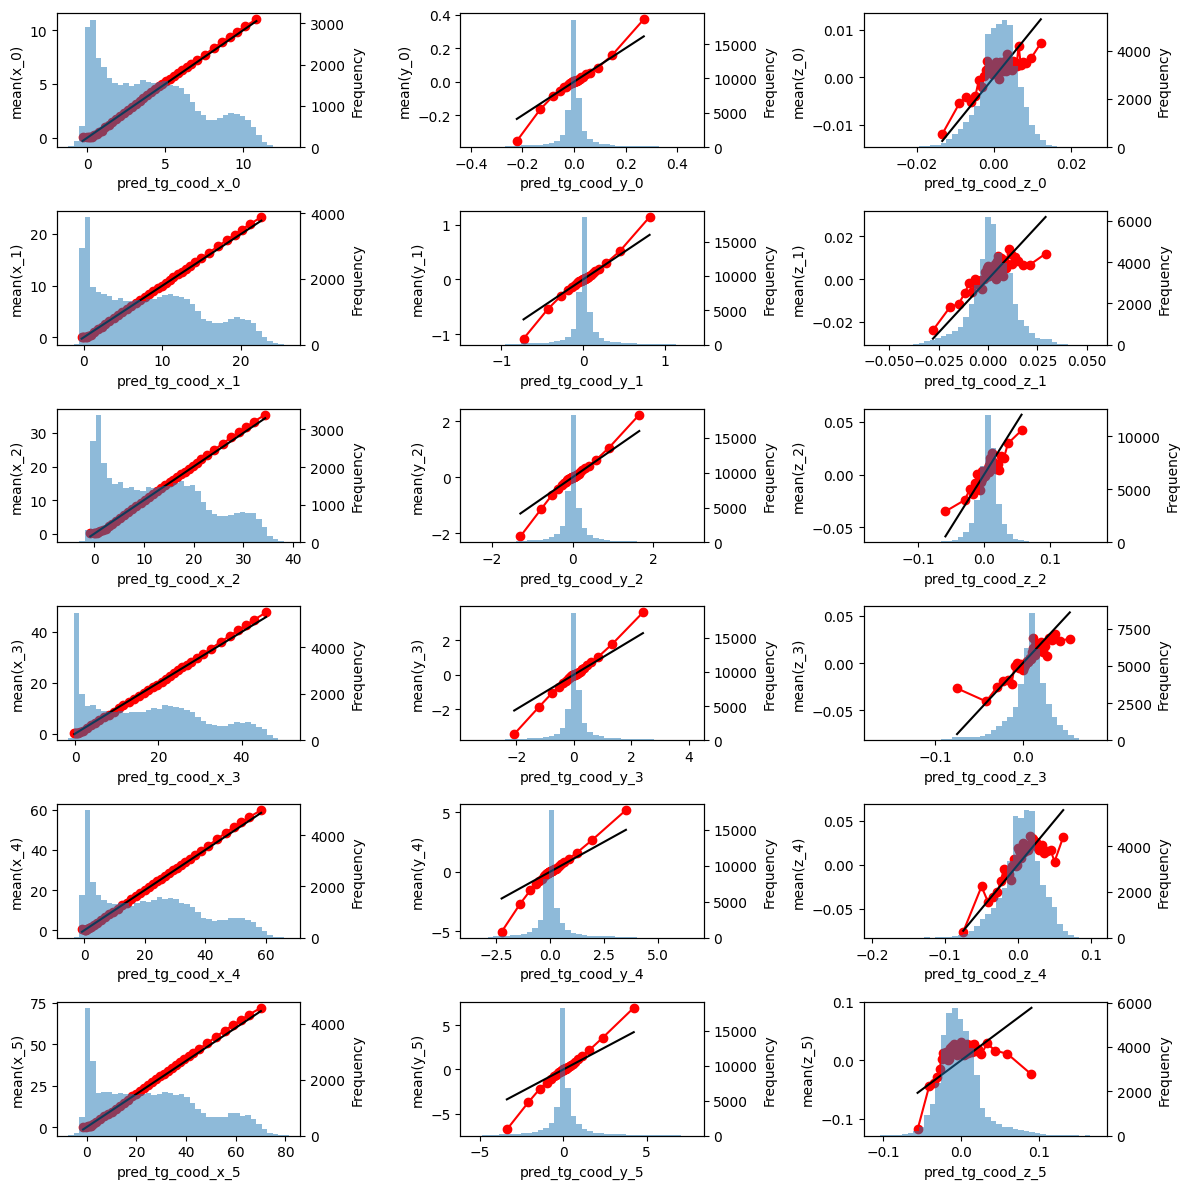

In [14]:
utils.plot_calibration_curve(tr_df, pred_cols, n_bins=40)

## Submission

In [15]:
preds = utils.predict(models, ts_images, ts_df, feature.columns, pred_cols)
preds

pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
1.467971,-0.011225,-0.001694,3.112367,-0.026978,0.000186,4.028967,-0.062971,0.00486,6.084704,-0.097156,0.00346,7.711443,-0.109723,-0.001106,8.789959,-0.124263,-0.008758
0.892289,0.245808,-0.000185,2.090641,0.738836,0.000552,3.918466,1.480051,-0.01476,2.660213,2.083444,-0.014498,5.187123,2.990793,-0.015187,6.626025,3.553006,0.015549
1.548283,-0.001203,0.001741,3.702408,0.000545,0.003132,5.709162,0.00229,0.010391,6.861384,-0.013782,0.01232,8.934422,-0.045236,0.011208,10.036503,-0.026322,0.000035
1.329939,0.055022,-0.012525,1.995535,0.172916,-0.024891,0.77788,0.331021,-0.048191,3.629903,0.472365,-0.034677,2.156892,0.698227,-0.060103,4.560501,0.806173,-0.022739
1.154608,-0.000369,-0.008173,1.920393,0.012562,-0.015389,1.552571,-0.003124,-0.013957,4.316446,-0.01217,-0.014722,3.804027,0.028689,-0.038814,6.647493,0.045071,-0.015064
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6.486765,0.042229,0.002237,13.126107,0.140263,0.001126,20.611237,0.303527,-0.001593,27.697178,0.467689,-0.004798,33.705246,0.721674,-0.011415,41.74118,0.998001,-0.016089
6.786749,-0.008163,0.001603,14.852921,-0.025728,0.006645,22.265648,-0.066815,0.012598,30.982321,-0.064639,0.024477,38.462784,-0.156254,0.014985,44.22847,-0.185488,0.003641
7.15942,-0.012511,0.001373,15.555717,-0.038257,0.005975,23.432911,-0.093258,0.011155,32.521988,-0.09962,0.026487,40.159939,-0.204523,0.016327,46.657833,-0.253108,0.004569


In [16]:
def create_submission_csv(preds: pl.DataFrame, filename: str = "submission.csv"):
    submission_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    # validate preds columns
    if len(preds.columns) != len(submission_cols):
        raise ValueError(
            f"preds columns must be {len(submission_cols)}, but got {len(preds.columns)}"
        )

    preds.columns = submission_cols
    preds.write_csv(filename)
    print(f"Submission file is created: {filename}")


create_submission_csv(preds)

Submission file is created: submission.csv
